In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#Very good API for splitting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

#from _future_ import print_function, division
from future.utils import iteritems
from builtins import range
#from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#apply encoding since if just go with the default, python will pop out unreadable character error
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')


FileNotFoundError: [Errno 2] File b'spam.csv' does not exist: b'spam.csv'

In [5]:
#drop the unuseful columns
data= data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

NameError: name 'data' is not defined

In [7]:
#rename the columns into meaningful names
data.columns= ['label','text']

In [23]:
#restructure the label column into binary numeric values
data['binary_label']=data['label'].map({'ham':0,'spam':1})
data.head()

,label,text,binary_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


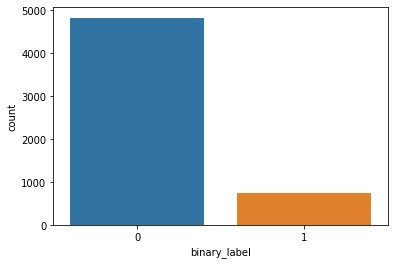

In [44]:
sns.countplot(data['binary_label'])

In [16]:
Y=data['binary_label'].as_matrix()
type(Y)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [32]:
count_vectorizer= CountVectorizer(decode_error='ignore')
X=count_vectorizer.fit_transform(data['text'])

In [35]:
tfidf = TfidfVectorizer(decode_error='ignore')
X=tfidf.fit_transform(data['text'])

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.33)

In [34]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
pred=model.predict(Xtest)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(classification_report(Ytest,pred))
print(confusion_matrix(Ytest,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1616
           1       1.00      0.76      0.87       223

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.97      1839

[[1616    0]
 [  53  170]]


In [50]:
data['predictions']=model.predict(X)
data.head()

,label,text,binary_label,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [57]:
sneaky_spam = data[(data['predictions']==0)&(data['binary_label']==1)]['text']
len(sneaky_spam)

211

In [54]:
for msg in sneaky_spam:
    print()
    print(msg)


FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL

Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged

Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"

You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again

FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p p

In [58]:
not_actually_spam = data[(data['predictions']==1)&(data['binary_label']==0)]['text']
len(not_actually_spam)

0